<a href="https://www.kaggle.com/code/megr25/california-houses-neural-network-xgboost?scriptVersionId=113094548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns 
import math 
import re
from IPython.display import display
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import norm,skew
import folium 
pd.options.display.float_format = '{:.2f}'.format

sns.set_style("whitegrid")
%matplotlib inline

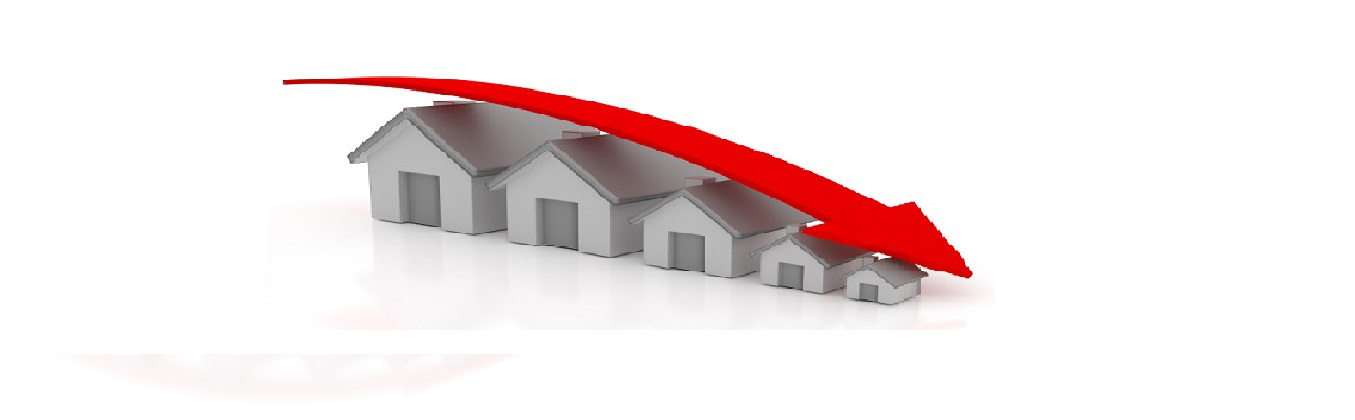

In [2]:
path=('../input/images/House.jpg')
display(Image.open(path))

> # **Thanks a lot for passing by..**.  
- In this notebook I am analyzing **California House Dataset**, I applied some techniques (I'ver learned few weeks ago) such as **GridSearchCv, RandomsearchCv , OutlierDetection** , ***StratifiedShuffleSplit*** and others with a simple set 
- There were only 200 Nan Values but thanks to loops and Dicctionaty interaction I was able to find the average (between specific range) to fill out the missing Values 
- I am evaluating Linear regression, XGBboost Regressor , Decision tree Regressor , Support Vecor Machine Regressor and Random Forest Regressor and I will use Neural Network Soon..!!
- I am using the OSEMN Methodology 
> - LET'S START

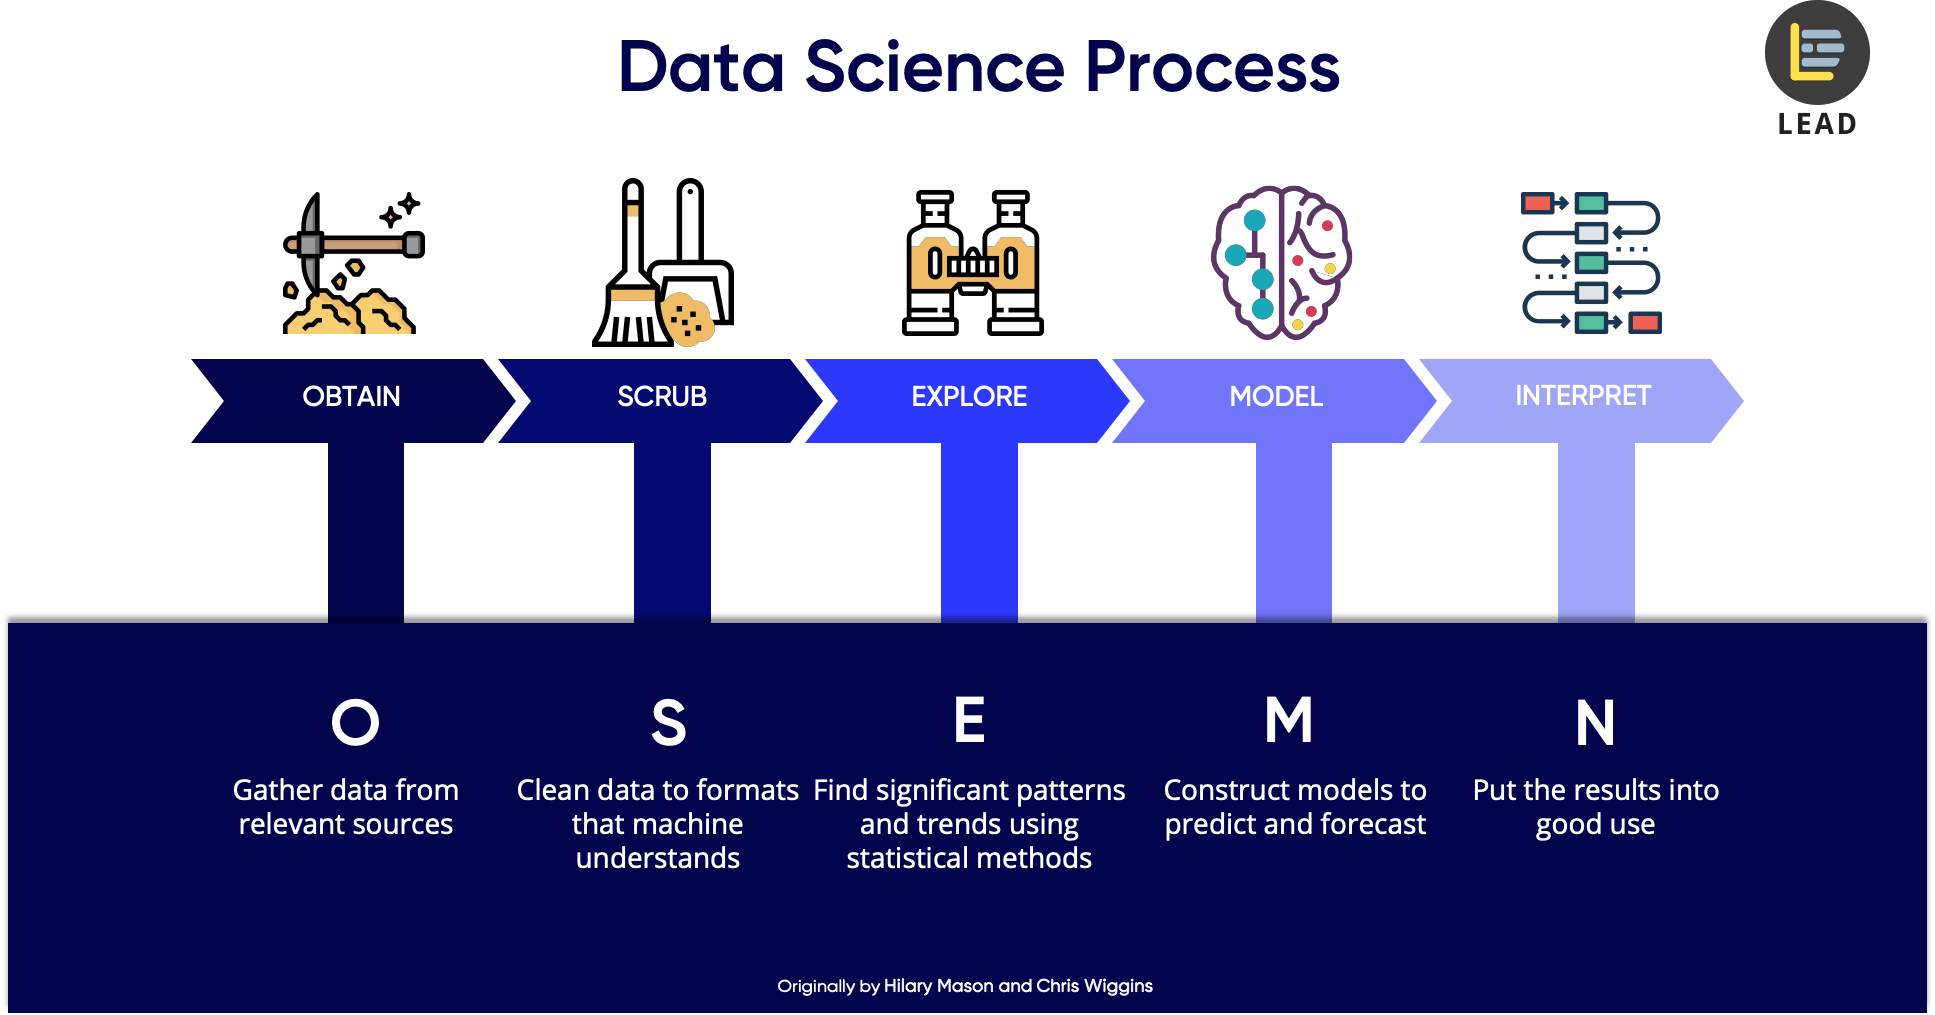

In [3]:
path=('../input/images-2/data.png')
display(Image.open(path))

# 1. Obtaining Data  

In [4]:
df = pd.read_csv("../input/california-housing-prices/housing.csv")
df.tail(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20630    -121.32     39.29               11.00      2640.00          505.00   
20631    -121.40     39.33               15.00      2655.00          493.00   
20632    -121.45     39.26               15.00      2319.00          416.00   
20633    -121.53     39.19               27.00      2080.00          412.00   
20634    -121.56     39.27               28.00      2332.00          395.00   
20635    -121.09     39.48               25.00      1665.00          374.00   
20636    -121.21     39.49               18.00       697.00          150.00   
20637    -121.22     39.43               17.00      2254.00          485.00   
20638    -121.32     39.43               18.00      1860.00          409.00   
20639    -121.24     39.37               16.00      2785.00          616.00   

       population  households  median_income  median_house_value  \
20630     1257.00      445.00           3.57           112000.00   
20631     1200.00      432.00           3.52           107200.00   
20632     1047.00      385.00           3.12           115600.00   
20633     1082.00      382.00           2.55            98300.00   
20634     1041.00      344.00           3.71           116800.00   
20635      845.00      330.00           1.56            78100.00   
20636      356.00      114.00           2.56            77100.00   
20637     1007.00      433.00           1.70            92300.00   
20638      741.00      349.00           1.87            84700.00   
20639     1387.00      530.00           2.39            89400.00   

      ocean_proximity  
20630          INLAND  
20631          INLAND  
20632          INLAND  
20633          INLAND  
20634          INLAND  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [5]:
df.describe()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   20640.00  20640.00            20640.00     20640.00        20433.00   
mean     -119.57     35.63               28.64      2635.76          537.87   
std         2.00      2.14               12.59      2181.62          421.39   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.80     33.93               18.00      1447.75          296.00   
50%      -118.49     34.26               29.00      2127.00          435.00   
75%      -118.01     37.71               37.00      3148.00          647.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  
count    20640.00    20640.00       20640.00            20640.00  
mean      1425.48      499.54           3.87           206855.82  
std       1132.46      382.33           1.90           115395.62  
min          3.00        1.00           0.50            14999.00  
25%        787.00      280.00           2.56           119600.00  
50%       1166.00      409.00           3.53           179700.00  
75%       1725.00      605.00           4.74           264725.00  
max      35682.00     6082.00          15.00           500001.00

# 2. Scrubing - Cleaning, Filling and Formating  

### 2.1. Filling 
- In this section first I found the Missing Values, then I noticed some relation btwn Totalbedrooms ~ TotalRooms - "Please check the Correlation chart" , So what I found the Nan Valeus , checked the Totalbedrooms and find the averge according to the same # in Total_bedrooms, Then I Create a Dicctionary and Repalce the Values. The  15 NAN values represent 15 range of non Found values in TotalBedrooms.

Mssing Values


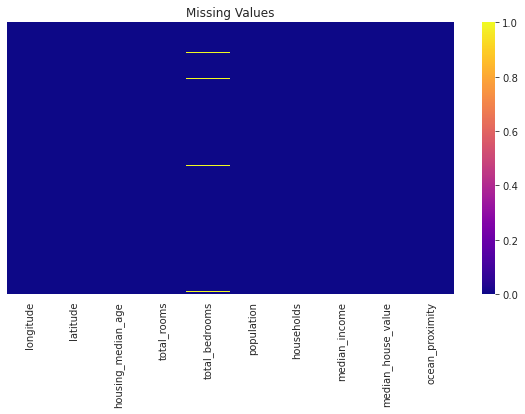

In [6]:
fig,(ax1) = plt.subplots(1, figsize=(10,5))

sns.heatmap(df.isnull(), yticklabels = False , cmap = 'plasma', ax = ax1).set_title("Missing Values")
print("Mssing Values")

In [7]:
# --->  Finding Missing Values 

Missing_values=df[df.isna().any(axis=1)].sort_values(by='total_rooms')['total_rooms'].values
                                                                                         
#--> iterating to get the mean Values 

TB = [] #< -- Here total Bedroom
MV = [] #< -- Here Mean values 

for i in Missing_values:
    values = df[df['total_rooms'] == i]['total_bedrooms'].mean()
    values= round(values,1)
    TB.append(i)
    MV.append(values)
    
#--> Creating Dicctionaty to Group the final Values

Key = TB
VAL = MV
dic = dict(zip(Key,VAL)) # In this dictionaty we have Nan Values 

#--> Eliminating Nan Values from Dicctionaty
new_dic = {k : v for k,v in dic.items() if pd.Series(v).notna().all()}
T_nan_values =len(dic)-len(new_dic)

# Total Nan Values 
print ("Total Nan Values in dict =",T_nan_values)

Total Nan Values in dict = 15


In [8]:
#--> Replacing Values 

for i, j in new_dic.items():
    df.loc[(df['total_rooms'] == i) & (df['total_bedrooms']!= i), 'total_bedrooms'] = j 
    #find Values in Total roms that = i and total bedrooms == nan and repace them by J.value
    
df[df.isnull().any(axis = 1)] # Excatly the 15 Nan Values 

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3354     -120.67     40.50               15.00      5343.00             nan   
3485     -118.55     34.28               16.00      8879.00             nan   
3778     -118.40     34.17               24.00      6347.00             nan   
3912     -118.55     34.19               18.00      5862.00             nan   
4046     -118.49     34.13               24.00      4394.00             nan   
6298     -117.91     34.02               22.00      6269.00             nan   
6814     -118.07     34.10               32.00      4275.00             nan   
9149     -118.50     34.46               17.00     10267.00             nan   
12101    -117.34     33.94               13.00      7910.00             nan   
13311    -117.61     34.08               12.00      4427.00             nan   
13933    -117.31     34.25               29.00      4610.00             nan   
15397    -117.20     33.24               12.00      4992.00             nan   
18346    -122.15     37.43               20.00     11709.00             nan   
19252    -122.79     38.48                7.00      6837.00             nan   
20460    -118.75     34.29               17.00      5512.00             nan   

       population  households  median_income  median_house_value  \
3354      2503.00      902.00           3.60            85900.00   
3485      3468.00     1200.00           8.11           428600.00   
3778      2945.00     1492.00           3.35           221500.00   
3912      3161.00     1280.00           3.11           170600.00   
4046      1443.00      528.00          11.30           500001.00   
6298      5587.00     1251.00           3.82           136200.00   
6814      2812.00     1012.00           3.35           214100.00   
9149      4956.00     1483.00           5.51           239400.00   
12101     3382.00     1176.00           5.56           214500.00   
13311     2400.00      843.00           4.71           158700.00   
13933     1569.00      592.00           2.77            97900.00   
15397     2106.00      801.00           6.21           307300.00   
18346     7604.00     3589.00           1.90           375000.00   
19252     3468.00     1405.00           3.17           191000.00   
20460     2734.00      814.00           6.61           258100.00   

      ocean_proximity  
3354           INLAND  
3485        <1H OCEAN  
3778        <1H OCEAN  
3912        <1H OCEAN  
4046        <1H OCEAN  
6298        <1H OCEAN  
6814        <1H OCEAN  
9149        <1H OCEAN  
12101          INLAND  
13311          INLAND  
13933          INLAND  
15397       <1H OCEAN  
18346        NEAR BAY  
19252       <1H OCEAN  
20460       <1H OCEAN

In [9]:
value = np.mean(df.total_bedrooms)
df.total_bedrooms.fillna(value =value, inplace = True)

### 2.2. Formating 
-  Enconding Variable with N categories with their names Using Onehotencoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

ohc= OneHotEncoder()
ohe=ohc.fit_transform(df.ocean_proximity.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe ,columns=["Ocean_"+str(ohc.categories_[0][i])
                                     for i in range(len(ohc.categories_[0]))])

data =pd.concat([df,dfOneHot],axis=1)


data.tail(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20637    -121.22     39.43               17.00      2254.00          482.40   
20638    -121.32     39.43               18.00      1860.00          409.00   
20639    -121.24     39.37               16.00      2785.00          616.00   

       population  households  median_income  median_house_value  \
20637     1007.00      433.00           1.70            92300.00   
20638      741.00      349.00           1.87            84700.00   
20639     1387.00      530.00           2.39            89400.00   

      ocean_proximity  Ocean_<1H OCEAN  Ocean_INLAND  Ocean_ISLAND  \
20637          INLAND             0.00          1.00          0.00   
20638          INLAND             0.00          1.00          0.00   
20639          INLAND             0.00          1.00          0.00   

       Ocean_NEAR BAY  Ocean_NEAR OCEAN  
20637            0.00              0.00  
20638            0.00              0.00  
20639            0.00              0.00

# 3. Explore - Finding significant Pattern and Trends

### 3.1. Folium - Real Location 
-  Using Folium Library to Locate the Houses , Age and Prices (only the First 5000 Houses) 

In [11]:
#Creating Map 
USA = folium.Map(location = [37.880,-122.230],tiles='OpenStreetMap',
                   min_zoom = 6 , max_zoom = 13 , zoom_start = 7)

# Adding Position 
for (index,row) in data[0:5000].iterrows():
    folium.Circle(
        radius = int(row.loc['median_house_value'])/10000,
        location = [row.loc['latitude'], row.loc['longitude']],
        popup = 'House Age ' + str(row.loc['housing_median_age']), color = 'crimson',
        tooltip =  '<li><bold>Price :' + str(row.loc['median_house_value']) + str('K'),
        fill = True, fill_color ='#ccfa00').add_to(USA) 
    
display(USA)

### 3.2. Heatmap - Correlation
- As you might notices Total_rooms ~ Total_bedrooms and Total_population are strongly Correlated , the best apporach would have been Find the strong relation among then and compare them to the Target variable "Media_house_values" to reduce dimensionality (variables) but in this case I didnt do it because The set have few columns -variable so it is understandable instead i will create other Combination maybe i can get better resutls, However you can check my notebook " House price - advance Regression -  Where I have an example

Heatmap - Correlation


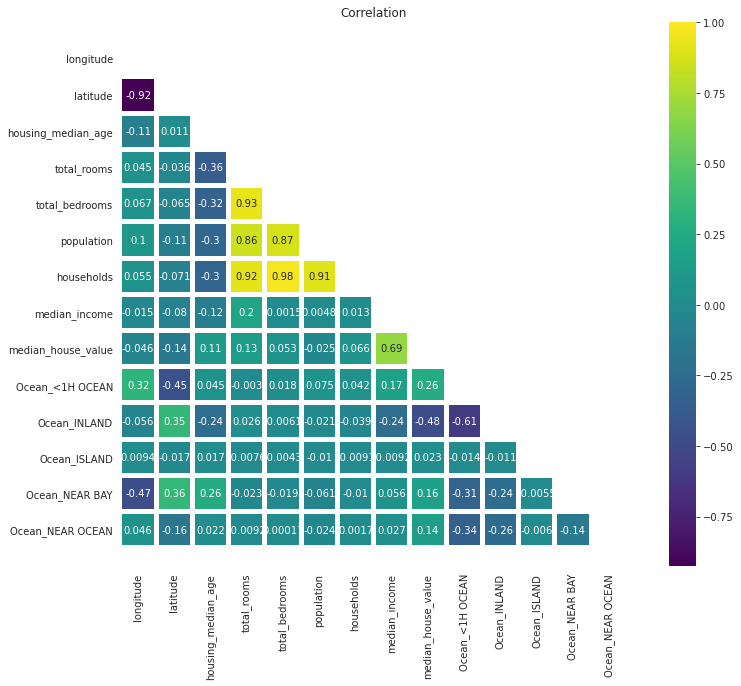

In [12]:
# Correlation 
correlation = data.corr()
f,ax =plt.subplots(figsize =(15,10))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, mask=mask , ax=ax, 
            linewidths = 4, cmap = 'viridis', square=True).set_title("Correlation")
bottom,top = ax.get_ylim()
ax.set_ylim (bottom + 0.5 , top - 0.5)
print("Heatmap - Correlation")

* Now I am interesting in knowing the average of bedrooms / Household , the average population / Household *** The Following code was subtracted from the book "On hand in Machine Learning and SkLearn" ***

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms,bedrooms,population,house= 3,4,5,6

class CombiAttri (BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_per_room = True):
        self.add_bedroom_per_room = add_bedroom_per_room
    
    def fit(self, X, y = None):
        return self
         
    def transform(self, X):
    #Divide # of rroms / # of houses
        RPH = X[:,rooms] / X[: , house] #Rooms per House
        PPH = X[:,population] / X[: , house] #Population per House 
    
        #Beddrooms per rooms
        if self.add_bedroom_per_room:
            ABR = X[: , bedrooms] / X [: , rooms]
            return np.c_[X, RPH ,PPH, ABR]
        else:
            return np.c_[X, RPH ,PPH]
        
#Running
others= CombiAttri()
extradata = others.transform(data.values)

#Showing
fdata = pd.DataFrame(
    extradata,
    columns = list(data.columns) + ["rooms_per_household", "population_per_household","bedrrom_per_room"], #adding the New columns
    index = data.index)

fdata.head()

longitude latitude housing_median_age total_rooms total_bedrooms population  \
0   -122.23    37.88              41.00      880.00         200.10     322.00   
1   -122.22    37.86              21.00     7099.00        1106.00    2401.00   
2   -122.24    37.85              52.00     1467.00         190.00     496.00   
3   -122.25    37.85              52.00     1274.00         235.00     558.00   
4   -122.25    37.85              52.00     1627.00         280.00     565.00   

  households median_income median_house_value ocean_proximity Ocean_<1H OCEAN  \
0     126.00          8.33          452600.00        NEAR BAY            0.00   
1    1138.00          8.30          358500.00        NEAR BAY            0.00   
2     177.00          7.26          352100.00        NEAR BAY            0.00   
3     219.00          5.64          341300.00        NEAR BAY            0.00   
4     259.00          3.85          342200.00        NEAR BAY            0.00   

  Ocean_INLAND Ocean_ISLAND Ocean_NEAR BAY Ocean_NEAR OCEAN  \
0         0.00         0.00           1.00             0.00   
1         0.00         0.00           1.00             0.00   
2         0.00         0.00           1.00             0.00   
3         0.00         0.00           1.00             0.00   
4         0.00         0.00           1.00             0.00   

  rooms_per_household population_per_household bedrrom_per_room  
0                6.98                     2.56             0.23  
1                6.24                     2.11             0.16  
2                8.29                     2.80             0.13  
3                5.82                     2.55             0.18  
4                6.28                     2.18             0.17

In [14]:
fdata.drop('ocean_proximity', axis = 1 , inplace = True)
fdata = fdata.astype(float)

### 3.3. Analizing Target Variable "Media_House_value"
- In here We can notice it has tail to the Right and several Values > 500K that Will affect the model because it will have bias, the best option i can think about would be 1. normalize 2. Drop some values 

TARGET 

Skewness: 0.978
Kurtosis: 0.328


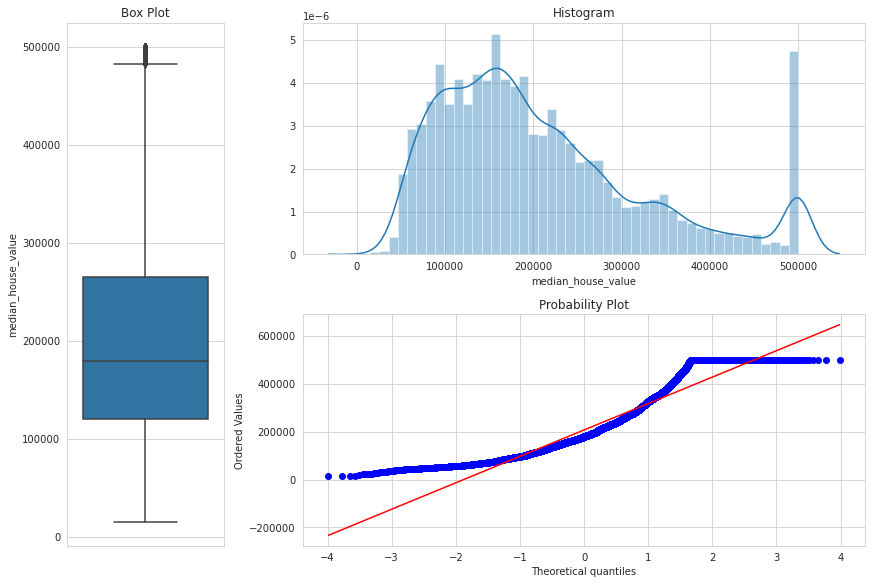

In [15]:
def mul_plot (df, feature):
    fig=plt.figure(constrained_layout = True , figsize = (12,8))
    grid= gridspec.GridSpec(ncols = 3 , nrows = 2 , figure=fig)

    ax1= fig.add_subplot(grid[0,1:3])
    ax1.set_title("Histogram")
    sns.distplot(df.loc[:,feature], norm_hist = True, ax= ax1)

    ax2= fig.add_subplot(grid[1,1:3])
    ax2.set_title("QQ_plot")
    stats.probplot(df.loc[:,feature] , plot=ax2)

    ax3= fig.add_subplot(grid[:2,0])
    ax3.set_title("Box Plot")
    sns.boxplot(df.loc[:,feature], orient = "v" , ax= ax3)
    
    print("Skewness: "+ str(fdata['median_house_value'].skew().round(3))) 
    print("Kurtosis: " + str(fdata['median_house_value'].kurt().round(3)))

mul_plot (fdata,'median_house_value')

In [16]:

indexes_2 = fdata.loc[(fdata['median_house_value']>100000) & (fdata['median_income']>=10)].index.to_list()
indexes_3 = fdata.loc[(fdata['median_house_value']>280000) & (fdata['median_income']<=2)].index.to_list()
indexes_4 = fdata.loc[(fdata['median_house_value']<280000) & (fdata['median_income']>=8)].index.to_list()
indexes_4 = fdata.loc[fdata['median_income']>=9].index.to_list()
indexes_1 = fdata.loc[fdata['median_house_value']>500000].index.to_list()

total_drop = indexes_1+indexes_2+indexes_3+indexes_4

In [17]:
fdata.reset_index(drop=True)
fdata.drop(total_drop, inplace= True)
fdata.reset_index(drop=True)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88               41.00       880.00          200.10   
1        -122.22     37.86               21.00      7099.00         1106.00   
2        -122.24     37.85               52.00      1467.00          190.00   
3        -122.25     37.85               52.00      1274.00          235.00   
4        -122.25     37.85               52.00      1627.00          280.00   
...          ...       ...                 ...          ...             ...   
19523    -121.09     39.48               25.00      1665.00          374.00   
19524    -121.21     39.49               18.00       697.00          150.00   
19525    -121.22     39.43               17.00      2254.00          482.40   
19526    -121.32     39.43               18.00      1860.00          409.00   
19527    -121.24     39.37               16.00      2785.00          616.00   

       population  households  median_income  median_house_value  \
0          322.00      126.00           8.33           452600.00   
1         2401.00     1138.00           8.30           358500.00   
2          496.00      177.00           7.26           352100.00   
3          558.00      219.00           5.64           341300.00   
4          565.00      259.00           3.85           342200.00   
...           ...         ...            ...                 ...   
19523      845.00      330.00           1.56            78100.00   
19524      356.00      114.00           2.56            77100.00   
19525     1007.00      433.00           1.70            92300.00   
19526      741.00      349.00           1.87            84700.00   
19527     1387.00      530.00           2.39            89400.00   

       Ocean_<1H OCEAN  Ocean_INLAND  Ocean_ISLAND  Ocean_NEAR BAY  \
0                 0.00          0.00          0.00            1.00   
1                 0.00          0.00          0.00            1.00   
2                 0.00          0.00          0.00            1.00   
3                 0.00          0.00          0.00            1.00   
4                 0.00          0.00          0.00            1.00   
...                ...           ...           ...             ...   
19523             0.00          1.00          0.00            0.00   
19524             0.00          1.00          0.00            0.00   
19525             0.00          1.00          0.00            0.00   
19526             0.00          1.00          0.00            0.00   
19527             0.00          1.00          0.00            0.00   

       Ocean_NEAR OCEAN  rooms_per_household  population_per_household  \
0                  0.00                 6.98                      2.56   
1                  0.00                 6.24                      2.11   
2                  0.00                 8.29                      2.80   
3                  0.00                 5.82                      2.55   
4                  0.00                 6.28                      2.18   
...                 ...                  ...                       ...   
19523              0.00                 5.05                      2.56   
19524              0.00                 6.11                      3.12   
19525              0.00                 5.21                      2.33   
19526              0.00                 5.33                      2.12   
19527              0.00                 5.25                      2.62   

       bedrrom_per_room  
0                  0.23  
1                  0.16  
2                  0.13  
3                  0.18  
4                  0.17  
...                 ...  
19523              0.22  
19524              0.22  
19525              0.21  
19526              0.22  
19527              0.22  

[19528 rows x 17 columns]

OUTLIERS 

- ***General Outliers***
- **LocalOutlierFactor** which use Knn to find outliers ... here you can have a great explanation https://www.youtube.com/watch?v=vnoBkTa7arI&t=14s

Outliers detected: Int64Index([5456, 4138, 17081, 1599, 10052], dtype='int64')


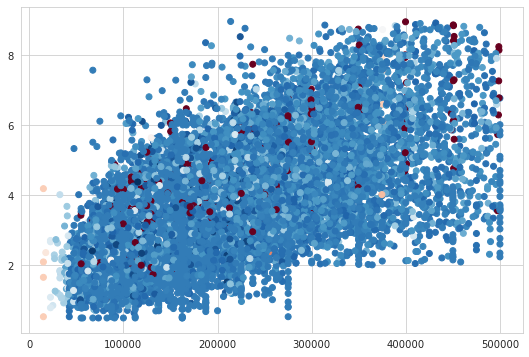

In [18]:
from sklearn.neighbors import LocalOutlierFactor

def outliers (x,y, top = 5 , plot = True):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    x_ =np.array(x).reshape(-1,1)
    preds = lof.fit_predict(x_)
    lof_scr = lof.negative_outlier_factor_
    out_idx = pd.Series(lof_scr).sort_values()[:top].index
    
    if plot:
        f, ax = plt.subplots(figsize=(9, 6))
        plt.scatter(x=x, y=y, c=np.exp(lof_scr), cmap='RdBu')
    return out_idx

outs = outliers(fdata['median_house_value'], fdata['median_income'],top=5)
print("Outliers detected:",outs)
plt.show()

DROPPING VALUES AND NORMALIZING

Skewness: -0.298
Kurtosis: -0.358


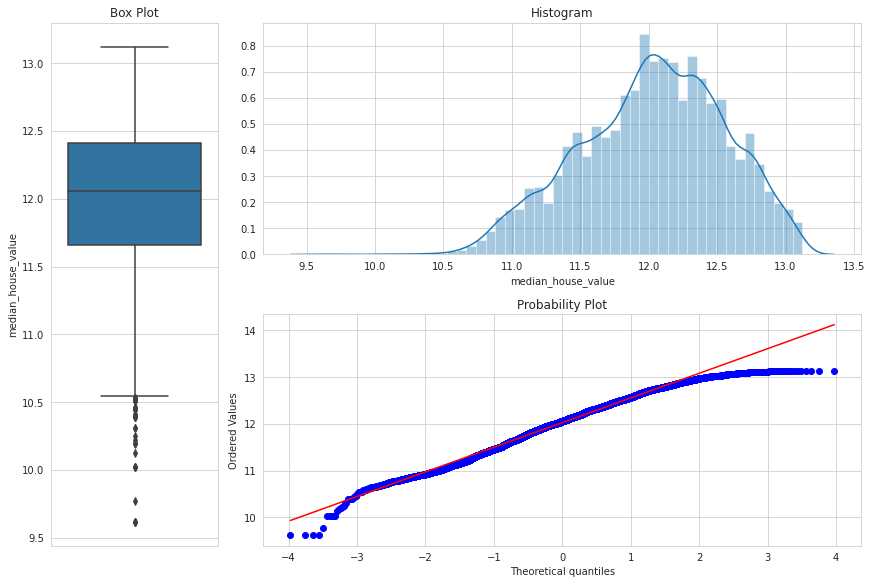

In [19]:
''' Normalizing '''

#--- Appliying Log10  = np.log1p()
fdata['median_house_value'] = np.log1p(fdata['median_house_value'])

#Creating new plot 
mul_plot (fdata,'median_house_value')

In [20]:
fdata.reset_index(drop=True)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88               41.00       880.00          200.10   
1        -122.22     37.86               21.00      7099.00         1106.00   
2        -122.24     37.85               52.00      1467.00          190.00   
3        -122.25     37.85               52.00      1274.00          235.00   
4        -122.25     37.85               52.00      1627.00          280.00   
...          ...       ...                 ...          ...             ...   
19523    -121.09     39.48               25.00      1665.00          374.00   
19524    -121.21     39.49               18.00       697.00          150.00   
19525    -121.22     39.43               17.00      2254.00          482.40   
19526    -121.32     39.43               18.00      1860.00          409.00   
19527    -121.24     39.37               16.00      2785.00          616.00   

       population  households  median_income  median_house_value  \
0          322.00      126.00           8.33               13.02   
1         2401.00     1138.00           8.30               12.79   
2          496.00      177.00           7.26               12.77   
3          558.00      219.00           5.64               12.74   
4          565.00      259.00           3.85               12.74   
...           ...         ...            ...                 ...   
19523      845.00      330.00           1.56               11.27   
19524      356.00      114.00           2.56               11.25   
19525     1007.00      433.00           1.70               11.43   
19526      741.00      349.00           1.87               11.35   
19527     1387.00      530.00           2.39               11.40   

       Ocean_<1H OCEAN  Ocean_INLAND  Ocean_ISLAND  Ocean_NEAR BAY  \
0                 0.00          0.00          0.00            1.00   
1                 0.00          0.00          0.00            1.00   
2                 0.00          0.00          0.00            1.00   
3                 0.00          0.00          0.00            1.00   
4                 0.00          0.00          0.00            1.00   
...                ...           ...           ...             ...   
19523             0.00          1.00          0.00            0.00   
19524             0.00          1.00          0.00            0.00   
19525             0.00          1.00          0.00            0.00   
19526             0.00          1.00          0.00            0.00   
19527             0.00          1.00          0.00            0.00   

       Ocean_NEAR OCEAN  rooms_per_household  population_per_household  \
0                  0.00                 6.98                      2.56   
1                  0.00                 6.24                      2.11   
2                  0.00                 8.29                      2.80   
3                  0.00                 5.82                      2.55   
4                  0.00                 6.28                      2.18   
...                 ...                  ...                       ...   
19523              0.00                 5.05                      2.56   
19524              0.00                 6.11                      3.12   
19525              0.00                 5.21                      2.33   
19526              0.00                 5.33                      2.12   
19527              0.00                 5.25                      2.62   

       bedrrom_per_room  
0                  0.23  
1                  0.16  
2                  0.13  
3                  0.18  
4                  0.17  
...                 ...  
19523              0.22  
19524              0.22  
19525              0.21  
19526              0.22  
19527              0.22  

[19528 rows x 17 columns]

# 4. Model - Machine Learning 

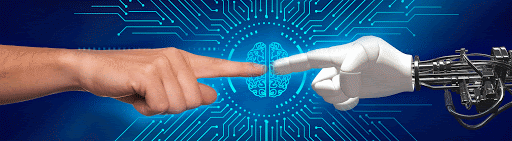

In [21]:
path=('../input/images/machine.gif')
display(Image.open(path))

MODELS & SPLITTING

In [22]:
#----> Applying Machine Learning 
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

In [23]:
# ------> Chossong the best model 
def Evaluating (model,X,Y, CV,Criteria,sqrt=True ):
    
    if sqrt :
        score = cross_val_score (model,X, Y, cv=CV ,scoring=Criteria)
        final = -score.mean()
        final = round(np.sqrt(final),2)
        MSE.append(final)
    else:
        score = cross_val_score (model,X, Y, cv=CV ,scoring=Criteria)
        final = round(score.mean(),2)
        R2.append(final)

# Machine Learning Algorithms + Cross_Validation

In [24]:
#-----> Categorizing 
fdata['income_cat'] = pd.cut(fdata["median_income"],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels=[1, 2, 3, 4, 5])

#------> Statify according to income data to have a proporcional distribution 
# ------> Variable 

criteria = fdata['income_cat'] 
X = fdata.drop("median_income", axis = 1)
y = fdata["median_income"]


# -----> Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = criteria)
X_train.drop("income_cat",axis = 1 , inplace = True)
X_test.drop("income_cat",axis = 1 , inplace = True)

# ------> StandarScaler
MX = MinMaxScaler()
X_train = MX.fit_transform(X_train)
X_test = MX.fit_transform(X_test)

X=X.values
y=y.values

In [25]:
# ------> Algorithms before Tunning 
LN = LinearRegression()
SGDR = SGDRegressor()
DT = DecisionTreeRegressor()
RDF = RandomForestRegressor()
SVR_rbf = SVR()
XR = XGBRegressor()

MSE = [np.nan]  #Mean Squared Error
R2= [np.nan]


# ------> Running models
for i in (LN , SGDR, DT, RDF,SVR_rbf,XR):
    Evaluating(i,X,y,4,'neg_mean_squared_error')

for i in (LN , SGDR, DT, RDF,SVR_rbf,XR):
    Evaluating(i,X,y,4,'r2',sqrt= False)


Best_model = pd.DataFrame(data = {'MSE':MSE,'R2':R2},
             index =['Neural_Network','Linear Regression','Stochastic Gradient Descent',
                     'DecisionTreeRegressor','RandomForestRegressor',
                     'Support Vector Machine','XGB Regressor'])
Best_model.sort_values(by = 'MSE' , ascending=True) 

MSE  \
RandomForestRegressor                      0.38   
XGB Regressor                              0.40   
Linear Regression                          0.42   
DecisionTreeRegressor                      0.53   
Support Vector Machine                     1.11   
Stochastic Gradient Descent 8947019712030505.00   
Neural_Network                              nan   

                                                              R2  
RandomForestRegressor                                       0.93  
XGB Regressor                                               0.93  
Linear Regression                                           0.92  
DecisionTreeRegressor                                       0.87  
Support Vector Machine                                      0.45  
Stochastic Gradient Descent -60690876943945382756218856013824.00  
Neural_Network                                               nan

# ** Hyperparameter** +  ** Cross_Validation** 

In [26]:
X = fdata.drop("median_income", axis = 1)
X.drop('income_cat', axis= 1 , inplace = True)
y = fdata["median_income"]

X= X.values
y=y.values

In [27]:
## -----------------------------> Support Vector Machine
SVR_rbf = SVR()
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[0.00,0.01,0.1,1],'gamma': [0.001,0.01,0.1,1],'epsilon':[0.1,0.2,0.3]}
SVR_RAND = RandomizedSearchCV(SVR_rbf,parameters,cv=5,n_iter = 50,scoring = 'neg_mean_absolute_error',n_jobs = -1,
                              verbose = 5,return_train_score=True,random_state=42)

## -----------------------------> Stochastic Gradient Descent
SGDR = SGDRegressor()
params={'alpha':[0.1,0.01,0.001,0.0001,0.00001],'learning_rate':['constant','optimal','invscaling','adaptive'],
        'max_iter':[100,300,600,1000,1200,1500,2000],'penalty':['l2','l1','elasticnet']}
SGDR_random_cv = RandomizedSearchCV(estimator = SGDR,param_distributions=params,cv=5,n_iter = 50,
                              scoring = 'neg_mean_absolute_error',n_jobs = 3,verbose = 5,return_train_score=True,random_state=42)

## -----------------------------> XGB Regressor

# ------> Tunnig XGBRegressor
XR = XGBRegressor()

# ------> Hyper Parameter Optimization
n_estimators = [100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]

# ------> Define the grid of Hyperparameters to search
hyperparameter_grid = { 'n_estimators': n_estimators,'max_depth': max_depth,'booster': booster,
                       'learning_rate': learning_rate,'min_child_weight': min_child_weight,
                       'base_score' : base_score}

XR_random_cv = RandomizedSearchCV(estimator = XR,param_distributions=hyperparameter_grid,cv=5,n_iter = 50,scoring = 'neg_mean_absolute_error',n_jobs = 3,
                              verbose = 5,return_train_score=True,random_state=42)

## -----------------------------> RandomForestRegressor
RDF = RandomForestRegressor()
parameters={'n_estimators': [30,10,30], 'max_features': [2,4,6,8],'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
clf_RDF = GridSearchCV(RDF, parameters , cv = 5 , scoring = 'neg_mean_squared_error', return_train_score = True)


In [28]:
## ----> Best estimatorBest estimator 
BSVR = SVR(C=1, gamma=1, kernel='poly')
BSGDR= SGDRegressor(alpha=0.1, learning_rate='adaptive')
BRF = RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)
BXR = XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
Model = [BSGDR,BRF,BXR]#,BSVR]
MSE = [np.nan,np.nan]  #Mean Squared Error
R2= [np.nan,np.nan]  #R2

for i in (BSGDR,BRF,BXR):
    Evaluating(i,X,y,4,'neg_mean_squared_error')

for i in (BSGDR,BRF,BXR):
    Evaluating(i,X,y,4,'r2',sqrt= False)


Best_model_2 = pd.DataFrame(data = {'MSE':MSE,'R2':R2},
             index =['Neural_Network','Support Vector Machine','Stochastic Gradient Descent','RandomForestRegressor','XGB Regressor'])
Best_model_2.sort_values(by = 'MSE' , ascending=True)

MSE                            R2
XGB Regressor                            0.72                          0.77
RandomForestRegressor                    0.74                          0.75
Stochastic Gradient Descent 11193078389684.92 -7292594461609031916060672.00
Neural_Network                            nan                           nan
Support Vector Machine                    nan                           nan

 # ** Neural Network** 

In [30]:
pip install livelossplot

     |████████████████████████████████| 423 kB 5.8 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.0.2
    Uninstalling tornado-5.0.2:
      Successfully uninstalled tornado-5.0.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

jupyterlab-git 0.10.0 requires nbdime<2.0.0,>=1.1.0, but you'll have nbdime 2.0.0 which is incompatible.
dask-xgboost 0.1.11 requires xgboost<=0.90, but you'll have xgboost 1.1.1 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


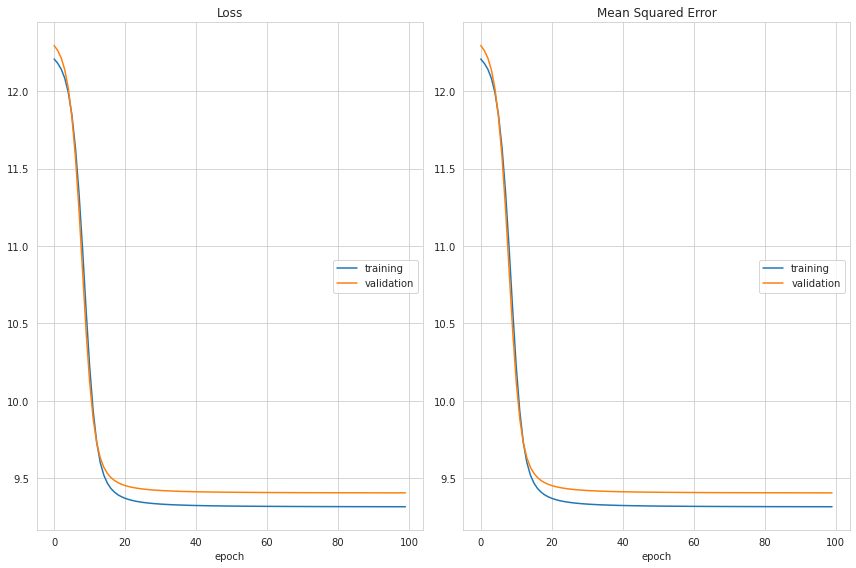

Loss
	training         	 (min:    9.316, max:   12.208, cur:    9.316)
	validation       	 (min:    9.405, max:   12.296, cur:    9.405)
Mean Squared Error
	training         	 (min:    9.316, max:   12.208, cur:    9.316)
	validation       	 (min:    9.405, max:   12.296, cur:    9.405)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
#from tensorflow.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from livelossplot import PlotLossesKeras


#Modeling
model = Sequential()
model.add(Dense(16, input_dim = (16),  kernel_initializer='normal', activation  = 'relu'))
model.add(Dense(4,  kernel_initializer='normal', activation  = 'relu'))

#compiling
model.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))
model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mse'])

model.fit(X_train,y_train,validation_data =(X_test,y_test),
          epochs = 100, batch_size= 1000, callbacks=[PlotLossesKeras()],verbose=0)

In [32]:
NN_model = model.predict(X_test)
print("The Mean Square Error using NN is ", round(np.sqrt(mean_squared_error(y_test,NN_model)),4))

The Mean Square Error using NN is  3.0668


 # *** Neural Network + K Fold ***

In [33]:
from sklearn.model_selection import KFold
from sklearn import metrics

x_main, x_holdout, y_main, y_holdout = train_test_split(X, y, test_size=0.10) 

# Cross-validate
kf = KFold(5)

oos_y = []
oos_pred = []
hist = []
fold = 0

for train, test in kf.split(x_main):        
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x_main[train]
    y_train = y_main[train]
    x_test = x_main[test]
    y_test = y_main[test]

    #Modeling
    model = Sequential()
    model.add(Dense(16, input_dim = (16),  kernel_initializer='normal', activation  = 'relu'))
    model.add(Dense(4,  kernel_initializer='normal', activation  = 'relu'))

    #compiling
    model.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))
    model.compile(loss = 'mse',
                optimizer = 'adam',
                 metrics = ['mse'])

    model.fit(x_train,y_train,validation_data =(x_test,y_test), epochs = 100, batch_size= 1000)
    history = pd.DataFrame(model.history.history)
    hist.append(history)
    pred = model.predict(x_test)
   
    oos_y.append(y_test)
    oos_pred.append(pred) 

    # Measure accuracy
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print(f"Fold score (RMSE): {score}")
    
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print()
print(f"Cross-validated score (RMSE): {score}")    
    
# Write the cross-validated prediction (from the last neural network)
holdout_pred = model.predict(x_holdout)

score = np.sqrt(metrics.mean_squared_error(holdout_pred,y_holdout))
print(f"Holdout score (RMSE): {score}")

Fold #1
Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 10.6036 - mse: 10.6036 - val_loss: 9.3111 - val_mse: 9.3111
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 9.5456 - mse: 9.5456 - val_loss: 9.1326 - val_mse: 9.1326
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 9.4585 - mse: 9.4585 - val_loss: 9.0993 - val_mse: 9.0993
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 9.4370 - mse: 9.4370 - val_loss: 9.0888 - val_mse: 9.0888
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 9.4309 - mse: 9.4309 - val_loss: 9.0855 - val_mse: 9.0855
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 9.4291 - mse: 9.4291 - val_loss: 9.0845 - val_mse: 9.0845
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 9.4285 - mse: 9.4285 - val_loss: 9.0840 - val_mse: 9.0840
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 

In [34]:
print(f"Cross-validated score (RMSE): {score}")
print(f"Holdout score (RMSE): {score}")

Cross-validated score (RMSE): 3.0352153797936356
Holdout score (RMSE): 3.0352153797936356


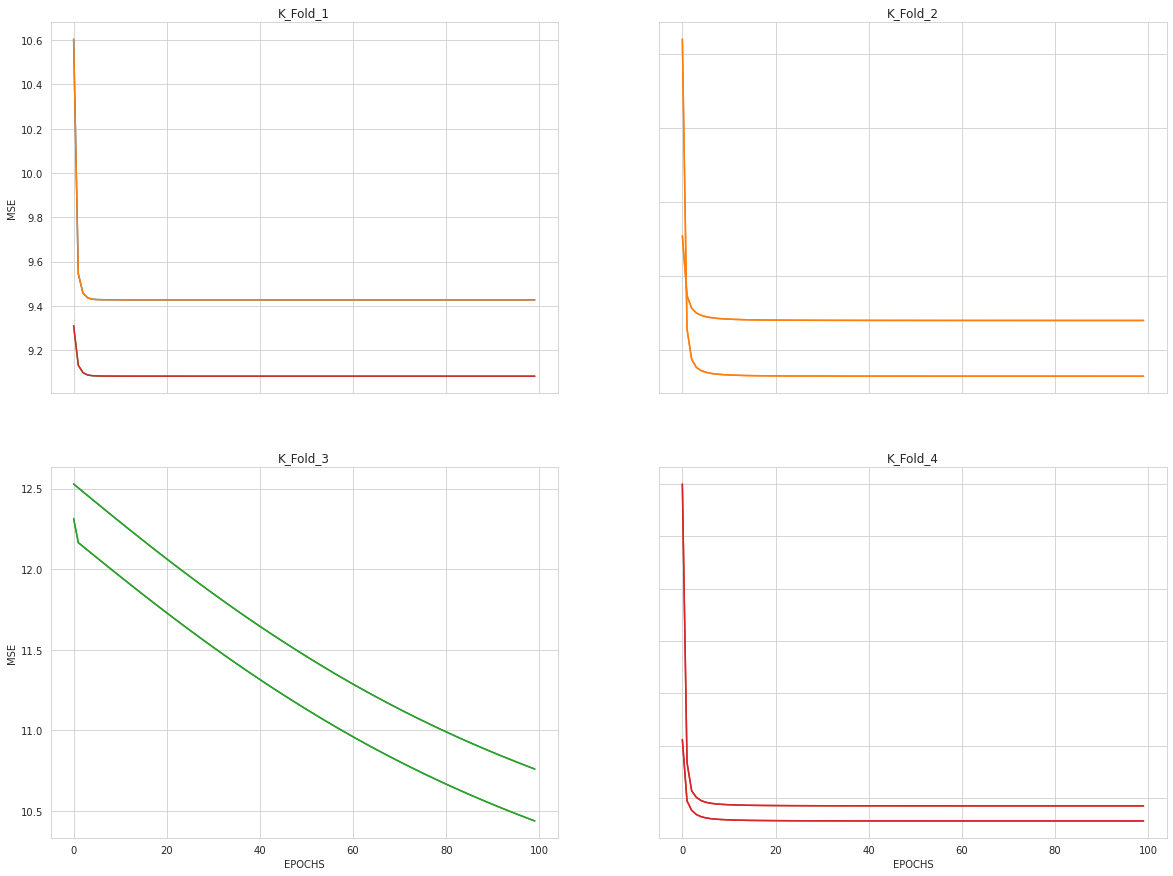

In [35]:
fig, axs = plt.subplots(2, 2, figsize= (20,15))
axs[0, 0].plot(hist[0])
axs[0, 0].set_title('K_Fold_1')
axs[0, 1].plot(hist[1], 'tab:orange')
axs[0, 1].set_title('K_Fold_2')
axs[1, 0].plot(hist[2], 'tab:green')
axs[1, 0].set_title('K_Fold_3')
axs[1, 1].plot(hist[3], 'tab:red')
axs[1, 1].set_title('K_Fold_4')

for ax in axs.flat:
    ax.set(xlabel='EPOCHS', ylabel='MSE')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# ***Conclusion***

### This "Kernel" is only for practicing purpose:
* After Hyperparameter tunning the model seems to be overfitted 
* Xgboost Regressor and NN regressor have the Best Performance
* K fold + NN codes are from @Jeff Heaton
* you can find the code on his video : https://www.youtube.com/watch?v=maiQf8ray_s
